<a href="https://colab.research.google.com/github/arnavtope11/Cnn_Cats_v_Dogs/blob/main/Load_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


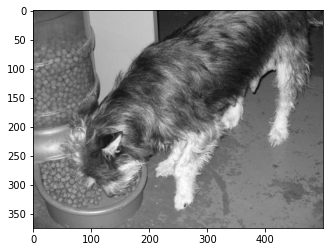

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/Colab/PetImages_dir/PetImages"

CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES: 
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
        plt.imshow(img_array, cmap='gray')
        plt.show() 

        break
    break

In [ ]:
print(img_array)

[[163 157 126 ...  33  30  29]
 [110 113  96 ...  36  34  34]
 [ 83  91  84 ...  29  27  26]
 ...
 [ 79  79  78 ... 108 106 104]
 [ 75  77  77 ... 108 106 103]
 [ 74  78  78 ... 108 105 103]]


In [ ]:
print(img_array.shape)

(375, 500)


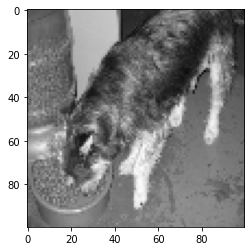

In [ ]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [ ]:
print(new_array.shape)

(100, 100)


In [ ]:
training_data = []

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category) 

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE) 
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num]) 
            except Exception as e:  
                pass
           
create_training_data()

print(len(training_data))

100%|██████████| 12496/12496 [48:03<00:00,  4.33it/s]

24967


In [ ]:
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
1
0
1
1
0


In [ ]:
for sample in training_data[:10]:
    print(sample[1])

1
1
1
1
0
1
0
1
1
0


In [ ]:
for sample in training_data[:10]:
    print(sample[0])

[[237 244 242 ... 241 244 239]
 [239 242 233 ... 234 241 239]
 [231 234  30 ...  23 238 239]
 ...
 [230 239  30 ...  27 246 239]
 [234 243 236 ... 236 241 239]
 [239 239 239 ... 239 239 239]]
[[ 81  90  90 ... 106  92  85]
 [ 81  90  90 ... 107  94  87]
 [ 81  90  91 ... 110  97  90]
 ...
 [240 251 250 ...  98  87  86]
 [234 236 251 ...  98  87  86]
 [229 250 244 ...  98  87  86]]
[[ 15  17  18 ... 215 218 218]
 [ 16  17  18 ... 215 212 208]
 [ 17  17  17 ... 209 209 210]
 ...
 [160 111 133 ...  65  61  91]
 [127  77  99 ...  57  65  69]
 [ 91  70  64 ...  51  68  77]]
[[ 85 113  80 ...  42  45  52]
 [106 110  77 ...  44  48  47]
 [104 117  85 ...  15 111 128]
 ...
 [ 67  70  56 ...  69  92  87]
 [ 59  68  56 ...  64  69  77]
 [ 69  56  60 ...  77  68  79]]
[[ 91  73 113 ...  60  85  82]
 [116  79 133 ...  63  92  72]
 [121  88 124 ...  71  87  79]
 ...
 [149 131 150 ...  92  89 104]
 [139 159 165 ...  85  97  94]
 [152 160 147 ...  70  82 107]]
[[209 209 209 ... 209 209 209]
 [209 209

In [ ]:
for sample in training_data[:20]:
    print(sample[1])

1
1
1
1
0
1
0
1
1
0
0
1
0
1
0
0
0
1
1
1


In [ ]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[237]
   [244]
   [242]
   ...
   [241]
   [244]
   [239]]

  [[239]
   [242]
   [233]
   ...
   [234]
   [241]
   [239]]

  [[231]
   [234]
   [ 30]
   ...
   [ 23]
   [238]
   [239]]

  ...

  [[230]
   [239]
   [ 30]
   ...
   [ 27]
   [246]
   [239]]

  [[234]
   [243]
   [236]
   ...
   [236]
   [241]
   [239]]

  [[239]
   [239]
   [239]
   ...
   [239]
   [239]
   [239]]]]


In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

FileNotFoundError: ignored

In [ ]:
import os
os.listdir('.')

['.config', 'adc.json', 'y.pickle', 'drive', 'X.pickle', 'sample_data']

In [ ]:
from google.colab import files
files.download("X.pickle")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>